In [7]:
import pandas as pd
df=pd.read_csv('cs-training.csv')
df

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [9]:
df.isnull().sum()

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [10]:
df = df.dropna(subset=['NumberOfDependents'])

In [11]:
df = df.drop(columns=['Unnamed: 0'])

In [12]:
df.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           25807
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                          0
dtype: int64

In [13]:
df['IncomeMissing']=df['MonthlyIncome'].isnull().astype(int)

In [14]:
median_income=df['MonthlyIncome'].median()
df['MonthlyIncome'].fillna(median_income,inplace=True)
df['MonthlyIncome'].isnull().sum()

0

In [15]:
df['SeriousDlqin2yrs'].value_counts()

SeriousDlqin2yrs
0    136229
1      9847
Name: count, dtype: int64

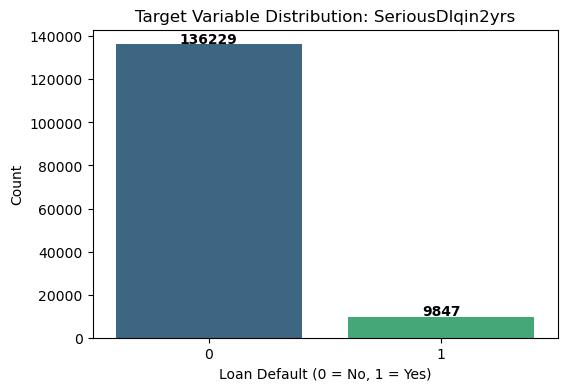

In [16]:
import matplotlib.pyplot as plt 
import seaborn as sns 
target_count=df['SeriousDlqin2yrs'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=target_count.index,y=target_count.values,palette='viridis')
plt.title("Target Variable Distribution: SeriousDlqin2yrs")
plt.xlabel("Loan Default (0 = No, 1 = Yes)")
plt.ylabel("Count")
for i, val in enumerate(target_count.values):
    plt.text(i, val + 500, str(val), ha='center', fontweight='bold')
plt.show()

In [17]:
df.corr()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,IncomeMissing
SeriousDlqin2yrs,1.000000,-0.001601,-0.113907,0.127084,-0.007747,-0.017495,-0.031478,0.118148,-0.008379,0.102397,0.046048,-0.017872
RevolvingUtilizationOfUnsecuredLines,-0.001601,1.000000,-0.005808,-0.001235,0.004059,0.006632,-0.011021,-0.000995,0.006633,-0.000987,0.001557,0.000193
age,-0.113907,-0.005808,1.000000,-0.057981,0.025773,0.029347,0.157961,-0.056152,0.041663,-0.052066,-0.213303,0.119659
NumberOfTime30-59DaysPastDueNotWorse,0.127084,-0.001235,-0.057981,1.000000,-0.006064,-0.008623,-0.052329,0.981770,-0.029059,0.985573,-0.002680,0.014117
DebtRatio,-0.007747,0.004059,0.025773,-0.006064,1.000000,-0.018321,0.051044,-0.007972,0.116461,-0.007118,-0.040673,0.340686
MonthlyIncome,-0.017495,0.006632,0.029347,-0.008623,-0.018321,1.000000,0.086866,-0.010848,0.116710,-0.009523,0.065296,-0.037090
NumberOfOpenCreditLinesAndLoans,-0.031478,-0.011021,0.157961,-0.052329,0.051044,0.086866,1.000000,-0.078079,0.430833,-0.068600,0.065322,-0.096083
NumberOfTimes90DaysLate,0.118148,-0.000995,-0.056152,0.981770,-0.007972,-0.010848,-0.078079,1.000000,-0.044271,0.991976,-0.010176,0.021046
NumberRealEstateLoansOrLines,-0.008379,0.006633,0.041663,-0.029059,0.116461,0.116710,0.430833,-0.044271,1.000000,-0.038429,0.124684,-0.047267
NumberOfTime60-89DaysPastDueNotWorse,0.102397,-0.000987,-0.052066,0.985573,-0.007118,-0.009523,-0.068600,0.991976,-0.038429,1.000000,-0.010922,0.020268


In [18]:
import pandas as pd

# Separate majority and minority
df_0 = df[df['SeriousDlqin2yrs'] == 0]
df_1 = df[df['SeriousDlqin2yrs'] == 1]

# Drop 15% of zeros randomly
df_0_under = df_0.sample(frac=0.85, random_state=42)  # keep 85% → drop 15%

# Combine back with minority
df_under = pd.concat([df_0_under, df_1], axis=0)

# Shuffle dataset
df_under = df_under.sample(frac=1, random_state=42).reset_index(drop=True)

# Check new distribution
print(df_under['SeriousDlqin2yrs'].value_counts(normalize=True))


SeriousDlqin2yrs
0    0.921627
1    0.078373
Name: proportion, dtype: float64


In [19]:
df_under['SeriousDlqin2yrs'].value_counts()

SeriousDlqin2yrs
0    115795
1      9847
Name: count, dtype: int64

In [20]:
X=df_under.drop('SeriousDlqin2yrs',axis=1)
y=df_under['SeriousDlqin2yrs']

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [42]:
model_1=LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
model_3=RandomForestClassifier()

In [20]:
from sklearn.metrics import classification_report

In [26]:
#logisitic regression
model_1.fit(X_train,y_train)
y_pred = model_1.predict(X_test)
report = classification_report(y_test, y_pred)
print("Classification Report for logistic :\n", report)

Classification Report for logistic :
               precision    recall  f1-score   support

           0       0.96      0.79      0.87     23160
           1       0.21      0.64      0.31      1969

    accuracy                           0.78     25129
   macro avg       0.59      0.72      0.59     25129
weighted avg       0.90      0.78      0.83     25129



In [22]:
#random forest
model_3.fit(X_train,y_train)
y_pred = model_3.predict(X_test)
report = classification_report(y_test, y_pred)
print("Classification Report for random forest:\n", report)

Classification Report for random forest:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96     23160
           1       0.57      0.21      0.30      1969

    accuracy                           0.93     25129
   macro avg       0.75      0.60      0.63     25129
weighted avg       0.91      0.93      0.91     25129



In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}
scorer = make_scorer(f1_score, pos_label=1)
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,              
    scoring=scorer,
    cv=3,                   
    verbose=2,
    random_state=42,
    n_jobs=-1
)
random_search.fit(X_train, y_train)
print("Best Parameters:", random_search.best_params_)
print("Best F1 Score (class 1):", random_search.best_score_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': 'log2', 'max_depth': None, 'bootstrap': True}
Best F1 Score (class 1): 0.45693541802501764


NameError: name 'X_test_scaled' is not defined

In [52]:
model_3=RandomForestClassifier(class_weight='balanced', random_state=42,n_estimators=200,min_samples_split= 2,min_samples_leaf= 8,max_features= 'log2',max_depth= None,bootstrap= True)
model_3.fit(X_train,y_train)
y_pred = model_3.predict(X_test)
report = classification_report(y_test, y_pred)
print("Classification Report for random forest:\n", report)

Classification Report for random forest:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94     23160
           1       0.39      0.56      0.46      1969

    accuracy                           0.90     25129
   macro avg       0.68      0.74      0.70     25129
weighted avg       0.92      0.90      0.91     25129



In [54]:
y_prob = model_3.predict_proba(X_test)[:, 1]
import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report

thresholds = np.arange(0.2, 0.6, 0.05)
for t in thresholds:
    y_pred_thresh = (y_prob >= t).astype(int)
    f1 = f1_score(y_test, y_pred_thresh)
    recall = recall_score(y_test, y_pred_thresh)
    precision = precision_score(y_test, y_pred_thresh)
    print(f"Threshold: {t:.2f} | Recall: {recall:.3f} | Precision: {precision:.3f} | F1: {f1:.3f}")

Threshold: 0.20 | Recall: 0.828 | Precision: 0.204 | F1: 0.327
Threshold: 0.25 | Recall: 0.782 | Precision: 0.235 | F1: 0.361
Threshold: 0.30 | Recall: 0.734 | Precision: 0.266 | F1: 0.390
Threshold: 0.35 | Recall: 0.687 | Precision: 0.297 | F1: 0.415
Threshold: 0.40 | Recall: 0.639 | Precision: 0.326 | F1: 0.432
Threshold: 0.45 | Recall: 0.597 | Precision: 0.362 | F1: 0.450
Threshold: 0.50 | Recall: 0.555 | Precision: 0.389 | F1: 0.458
Threshold: 0.55 | Recall: 0.517 | Precision: 0.424 | F1: 0.466


In [24]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score

In [25]:
n_zeros = sum(y_train == 0)
n_ones = sum(y_train == 1)
scale_pos_weight = n_zeros / n_ones
print("scale_pos_weight:", scale_pos_weight)

scale_pos_weight: 11.758695100279258


In [26]:
xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    use_label_encoder=False,
    random_state=42,
    scale_pos_weight=scale_pos_weight
)

In [27]:
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.7, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [1, 1.5, 2, 3]
}

In [28]:
scorer = make_scorer(f1_score, pos_label=1)

In [29]:
random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist,
    n_iter=50,       # number of random combinations
    scoring=scorer,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)
random_search.fit(X_train, y_train)
print("Best Parameters:", random_search.best_params_)
print("Best F1 Score (class 1):", random_search.best_score_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


C:\Users\gscke\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:41:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'subsample': 1.0, 'reg_lambda': 3, 'reg_alpha': 1, 'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.7}
Best F1 Score (class 1): 0.41417699318781814


In [30]:
y_pred = random_search.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93     23160
           1       0.32      0.58      0.41      1969

    accuracy                           0.87     25129
   macro avg       0.64      0.74      0.67     25129
weighted avg       0.91      0.87      0.89     25129



In [31]:
y_prob = random_search.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93     23160
           1       0.32      0.58      0.41      1969

    accuracy                           0.87     25129
   macro avg       0.64      0.74      0.67     25129
weighted avg       0.91      0.87      0.89     25129



In [32]:
import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report

thresholds = np.arange(0.2, 0.6, 0.05)
for t in thresholds:
    y_pred_thresh = (y_prob >= t).astype(int)
    f1 = f1_score(y_test, y_pred_thresh)
    recall = recall_score(y_test, y_pred_thresh)
    precision = precision_score(y_test, y_pred_thresh)
    print(f"Threshold: {t:.2f} | Recall: {recall:.3f} | Precision: {precision:.3f} | F1: {f1:.3f}")

Threshold: 0.20 | Recall: 0.826 | Precision: 0.181 | F1: 0.297
Threshold: 0.25 | Recall: 0.781 | Precision: 0.203 | F1: 0.322
Threshold: 0.30 | Recall: 0.741 | Precision: 0.226 | F1: 0.346
Threshold: 0.35 | Recall: 0.703 | Precision: 0.249 | F1: 0.367
Threshold: 0.40 | Recall: 0.663 | Precision: 0.275 | F1: 0.389
Threshold: 0.45 | Recall: 0.618 | Precision: 0.300 | F1: 0.404
Threshold: 0.50 | Recall: 0.575 | Precision: 0.324 | F1: 0.415
Threshold: 0.55 | Recall: 0.539 | Precision: 0.353 | F1: 0.426


In [33]:
best_model=random_search

In [34]:
import joblib
joblib.dump(best_model,"xgb_loan_default_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [35]:
loaded_model = joblib.load("xgb_loan_default_model.pkl")
loaded_scaler = joblib.load("scaler.pkl")

In [40]:
import pandas as pd
import numpy as np
new_data = {
    'RevolvingUtilizationOfUnsecuredLines': [0.5],
    'age': [45],
    'NumberOfTime30-59DaysPastDueNotWorse': [1],
    'DebtRatio': [0.3],
    'MonthlyIncome': [5000],
    'NumberOfOpenCreditLinesAndLoans': [5],
    'NumberOfTimes90DaysLate': [0],
    'NumberRealEstateLoansOrLines': [1],
    'NumberOfTime60-89DaysPastDueNotWorse': [0],
    'NumberOfDependents': [2],
    'IncomeMissing': [0]
}

new_df = pd.DataFrame(new_data) 
new_scaled = loaded_scaler.transform(new_df)


In [39]:
prob = loaded_model.predict_proba(new_scaled)[:, 1]
# Apply custom threshold
threshold = 0.3
pred = (prob >= threshold).astype(int)
print("Predicted probability of default:", prob[0])
print("Predicted class (0=No Default, 1=Default) with threshold 0.3:", pred[0])


Predicted probability of default: 0.35962763
Predicted class (0=No Default, 1=Default) with threshold 0.3: 1
